<a href="https://colab.research.google.com/github/ABUALHUSSEIN/ABUALHUSSEIN/blob/main/Healthcare_Anwar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file


Saving health.png to health.png


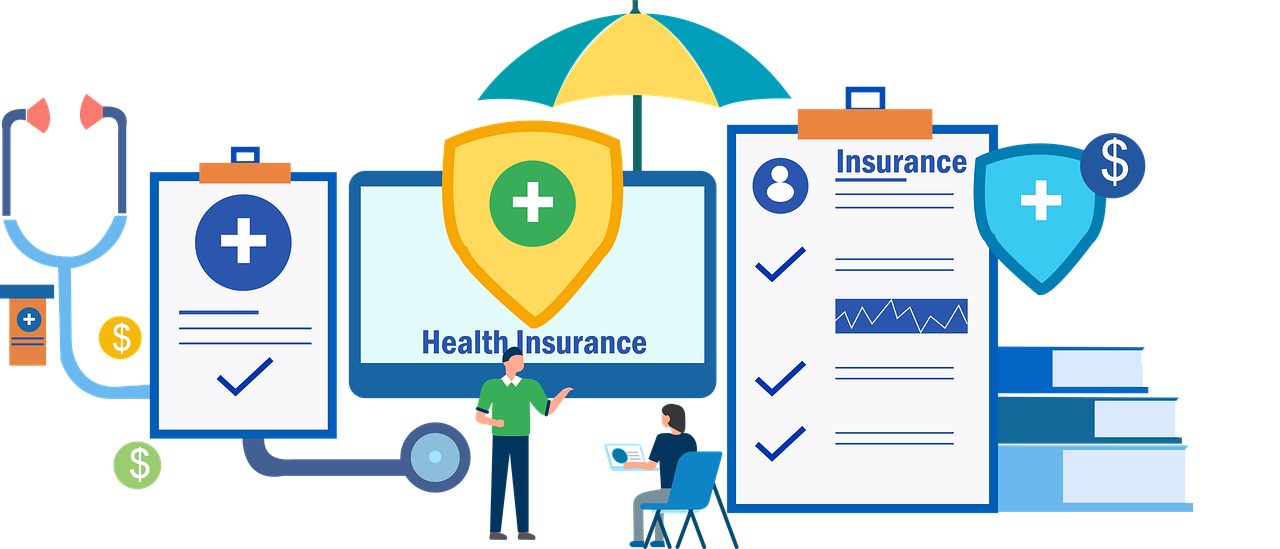

In [202]:
from IPython.display import display
from PIL import Image

image = Image.open("health.png")  # Replace with the actual file name
display(image)


#Step 1: Load & Inspect the Data

In [153]:
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and connect to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open Google Sheet using its key
spreadsheet = gc.open_by_key('1lINOQnDw0AxtPFdejFNcjL9_HS75sTPmlQsKVzRWD2g')

# Select first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Convert to DataFrame
df = pd.DataFrame(worksheet.get())

# Set first row as column headers
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)  # Drop first row and reset index

# Convert numerical columns to correct type (modify as needed)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Display first few rows
df.head()


<ipython-input-153-a8c85c31a733>:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,Patient_Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_Name        55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

#Step 2: Data Cleaning

#A. Standardize Text Data
To avoid issues with inconsistent text (like extra spaces or capitalization differences), clean text columns. For example, if your dataset has columns such as patient name, gender, medical condition, etc.:

In summary, creating a list of textual columns is a best practice in data preprocessing—it ensures that your subsequent text cleaning steps are applied correctly and efficiently to only the relevant parts of your data.

In [155]:
# List columns that are textual
text_columns = ['patient_name', 'gender', 'medical_condition', 'doctor',
                'hospital', 'insurance_provider', 'admission_type', 'medication',
                'test_results']  # Adjust names if necessary

# First, standardize the DataFrame's column names:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# If your columns in df are not exactly as above, update the list to match.
# For existing text columns, remove extra spaces and convert to lowercase:
available_text_cols = [col for col in text_columns if col in df.columns]
df[available_text_cols] = df[available_text_cols].apply(lambda col: col.str.strip().str.lower().str.replace(' ', '_'))


In [157]:
df.columns

Index(['patient_name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object', name=0)

Checks if any expected columns (text_columns) are missing from the DataFrame (df)

In [156]:
missing_cols = [col for col in text_columns if col not in df.columns]
print("Missing Columns:", missing_cols)


Missing Columns: []


It means that none of the expected columns are missing from your DataFrame.

#B. Handle Missing Values
Check for missing data and decide whether to impute or drop:

In [158]:
 (df.isnull().sum())

,0
0,
patient_name,0
age,0
gender,0
blood_type,0
medical_condition,0
date_of_admission,0
doctor,0
hospital,0
insurance_provider,0


To explore the distinct categories in a categorical variable

#C. Remove Duplicates

Eliminate duplicate records to avoid bias:

In [159]:
# Count duplicate rows in the entire DataFrame
duplicate_count = df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)


Number of duplicate records: 534


In [160]:
df = df.drop_duplicates()


In [161]:
# Count duplicate rows in the entire DataFrame
duplicate_count = df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)


Number of duplicate records: 0


#Step 3: Exploratory Data Analysis (EDA)
##A. Understand the Target Variable
Examine the distribution of “Test Results”:

To check if the "test_results" variable is balanced, you'll want to look at the distribution of its categories. Here are a few steps you can follow:

In [162]:
# Raw counts
print(df['test_results'].value_counts())

# Percentages (normalized)
print(df['test_results'].value_counts(normalize=True))


test_results
abnormal        18437
normal          18331
inconclusive    18198
Name: count, dtype: int64
test_results
abnormal        0.335426
normal          0.333497
inconclusive    0.331077
Name: proportion, dtype: float64


###Visualize the target distribution:

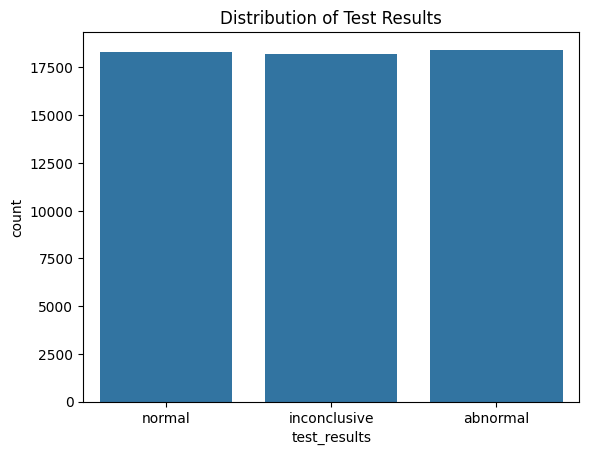

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='test_results', data=df)
plt.title("Distribution of Test Results")
plt.show()


The target variable ("test_results") looks pretty balanced:


#1️⃣ Convert Dates to DateTime Format#

In [164]:
# Convert columns to datetime format
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')




#2️⃣ Calculate Survival Time (in Days)
Now, create a new column "survival_time" by subtracting the two dates (difference between Discharge Date and Date of Admission):

In [165]:

# Now calculate survival time (in days)
df['survival_time'] = (df['discharge_date'] - df['date_of_admission']).dt.days


#3️⃣ Handle Missing or Incorrect Data
If there are missing or incorrect values (e.g., discharge date before admission), handle them:

In [166]:
# Handle missing values
df = df.dropna(subset=['date_of_admission', 'discharge_date'])

# Remove invalid cases where discharge date is before admission date
df = df[df['survival_time'] >= 0]


#4️⃣ Check the New Column
Verify that the new "survival_time" variable is created correctly:

In [167]:
print(df[['date_of_admission', 'discharge_date', 'survival_time']].head())


0 date_of_admission discharge_date  survival_time
0        2024-01-31     2024-02-02              2
1        2019-08-20     2019-08-26              6
2        2022-09-22     2022-10-07             15
3        2020-11-18     2020-12-18             30
4        2022-09-19     2022-10-09             20


Drop unnecessary columns: patient_name,doctor,hospital, should NOT be  because it is a unique identifier and does not provide meaningful information for prediction.

In [168]:
df = df.drop(columns=['date_of_admission', 'discharge_date','patient_name',
                      'doctor','hospital'])
df.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,room_number,admission_type,medication,test_results,survival_time
0,30,male,B-,cancer,blue_cross,18856.28131,328,urgent,paracetamol,normal,2
1,62,male,A+,obesity,medicare,33643.32729,265,emergency,ibuprofen,inconclusive,6
2,76,female,A-,obesity,aetna,27955.09608,205,emergency,aspirin,normal,15
3,28,female,O+,diabetes,medicare,37909.78241,450,elective,ibuprofen,abnormal,30
4,43,female,AB+,cancer,aetna,14238.31781,458,urgent,penicillin,abnormal,20


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 54966 non-null  int64  
 1   gender              54966 non-null  object 
 2   blood_type          54966 non-null  object 
 3   medical_condition   54966 non-null  object 
 4   insurance_provider  54966 non-null  object 
 5   billing_amount      54966 non-null  float64
 6   room_number         54966 non-null  int64  
 7   admission_type      54966 non-null  object 
 8   medication          54966 non-null  object 
 9   test_results        54966 non-null  object 
 10  survival_time       54966 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.0+ MB


In [170]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Count unique categories in each categorical column
for col in cat_cols:
    print(f"Variable '{col}' has {df[col].nunique()}  unique categories.")


Variable 'gender' has 2  unique categories.
Variable 'blood_type' has 8  unique categories.
Variable 'medical_condition' has 6  unique categories.
Variable 'insurance_provider' has 5  unique categories.
Variable 'admission_type' has 3  unique categories.
Variable 'medication' has 5  unique categories.
Variable 'test_results' has 3  unique categories.


##B. Correlation and Feature Relationships
For numerical features, you can check correlations:

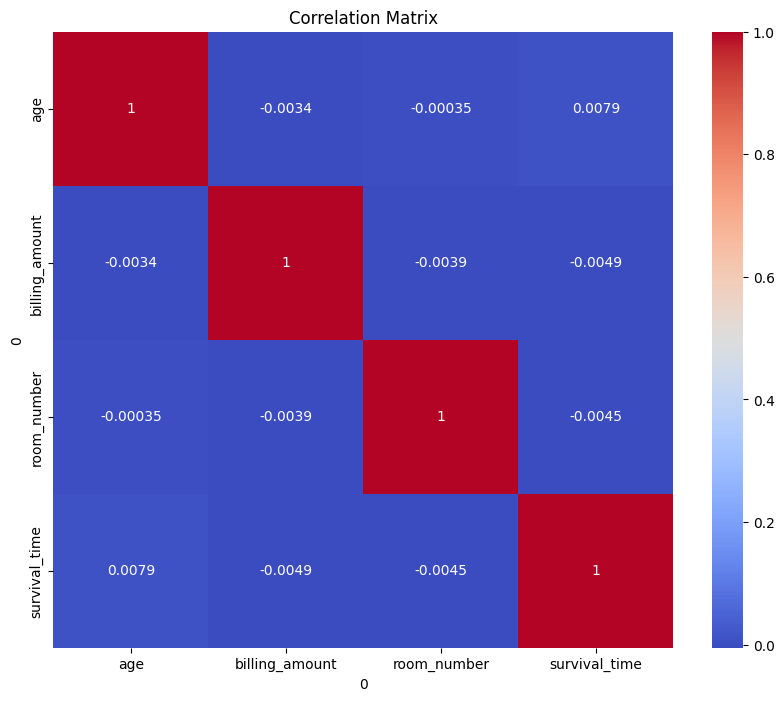

In [172]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Identify numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [173]:
# Pivot table to see how each category relates to test_results
categorical_columns = ['gender', 'medical_condition', 'admission_type', 'medication',
                       'blood_type','insurance_provider']  # Adjust as needed

for col in categorical_columns:
    pivot = df.pivot_table(index=col, columns='test_results', aggfunc='size', fill_value=0)
    print(f"Pivot Table for {col}:\n", pivot, "\n")


Pivot Table for gender:
 test_results  abnormal  inconclusive  normal
gender                                      
female            9247          9143    9080
male              9190          9055    9251 

Pivot Table for medical_condition:
 test_results       abnormal  inconclusive  normal
medical_condition                                
arthritis              3156          3062    3000
asthma                 2980          2999    3116
cancer                 3089          3033    3018
diabetes               3131          3024    3061
hypertension           2977          3068    3106
obesity                3104          3012    3030 

Pivot Table for admission_type:
 test_results    abnormal  inconclusive  normal
admission_type                                
elective            6232          6054    6187
emergency           6038          6020    6044
urgent              6167          6124    6100 

Pivot Table for medication:
 test_results  abnormal  inconclusive  normal
medication 

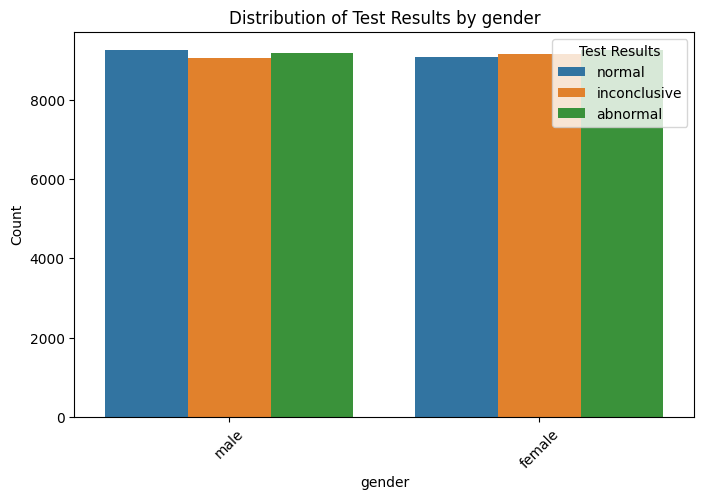

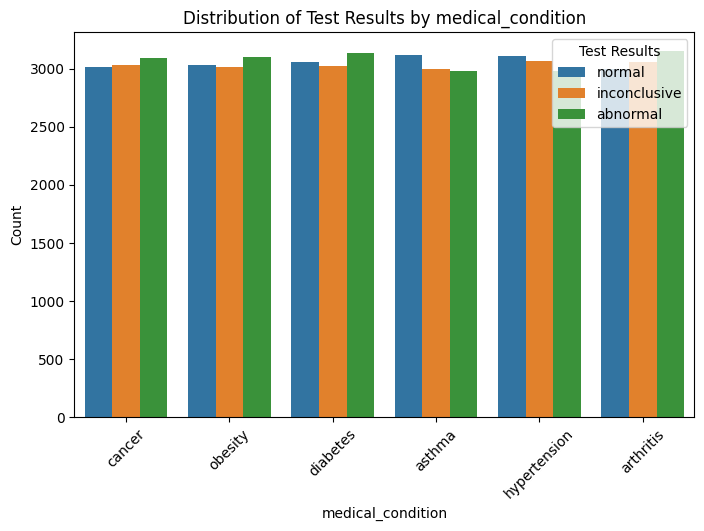

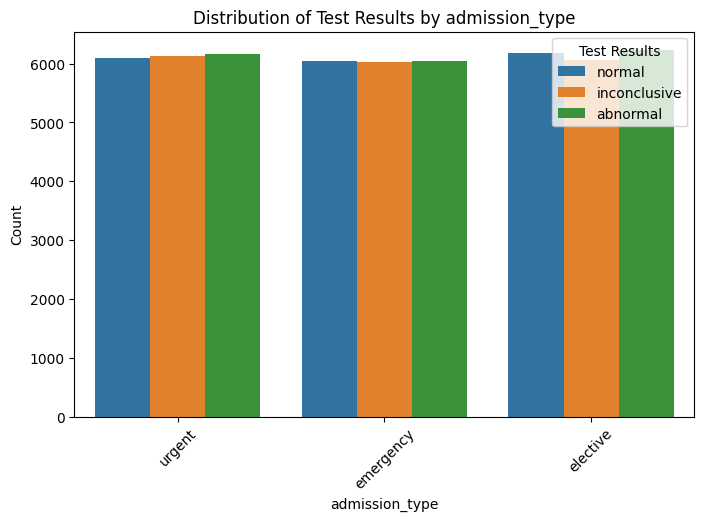

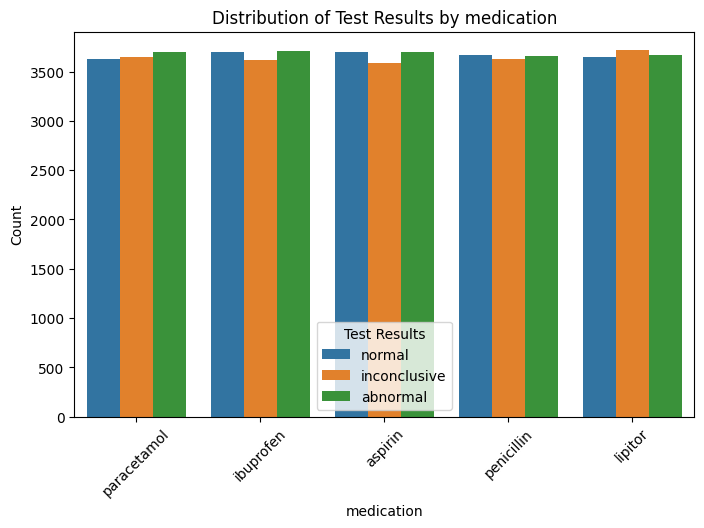

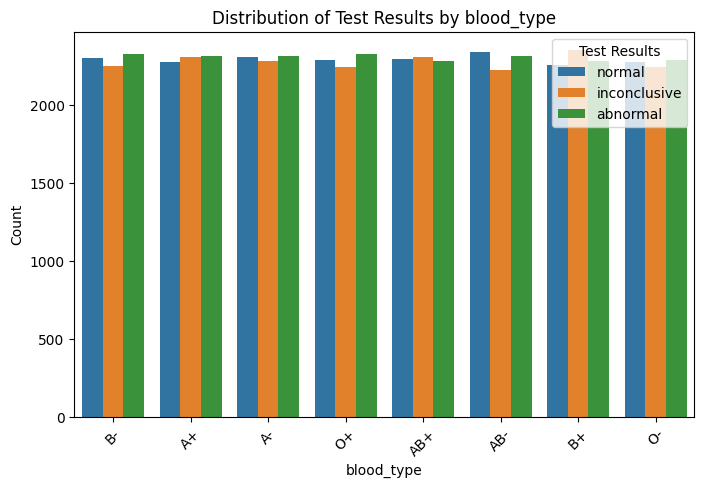

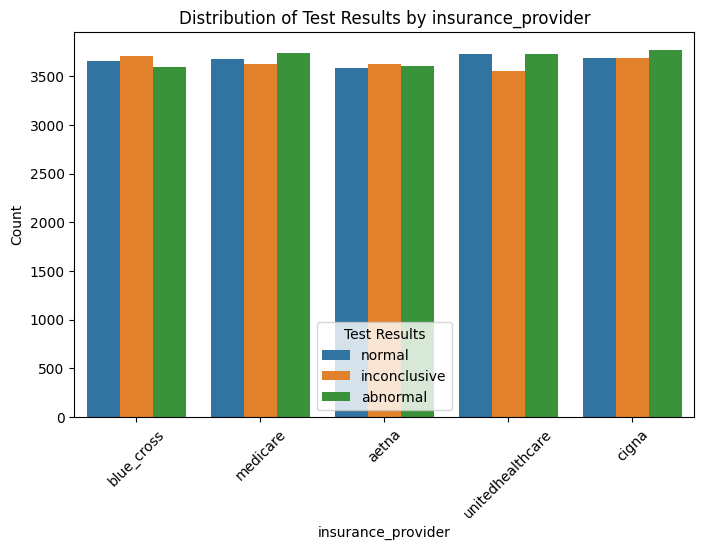

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to analyze
categorical_columns = ['gender', 'medical_condition', 'admission_type', 'medication',
                       'blood_type','insurance_provider']  # Adjust as needed

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='test_results')
    plt.title(f"Distribution of Test Results by {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Test Results")
    plt.show()


In [176]:
for col in categorical_columns:
    print(f"Percentage distribution of Test Results by {col}:")
    print(df.groupby(col)['test_results'].value_counts(normalize=True) * 100)
    print("\n")


Percentage distribution of Test Results by gender:
gender  test_results
female  abnormal        33.662177
        inconclusive    33.283582
        normal          33.054241
male    normal          33.644894
        abnormal        33.423043
        inconclusive    32.932063
Name: proportion, dtype: float64


Percentage distribution of Test Results by medical_condition:
medical_condition  test_results
arthritis          abnormal        34.237362
                   inconclusive    33.217618
                   normal          32.545021
asthma             normal          34.260583
                   inconclusive    32.974162
                   abnormal        32.765256
cancer             abnormal        33.796499
                   inconclusive    33.183807
                   normal          33.019694
diabetes           abnormal        33.973524
                   normal          33.213976
                   inconclusive    32.812500
hypertension       normal          33.941646
          



#Step 4: Feature Engineering & Selection
##A. Encoding Categorical Variables
Convert categorical features into numeric ones (using one-hot encoding):

In [177]:
# One-hot encode categorical variables

df = pd.get_dummies(df,columns = ['gender', 'medical_condition', 'admission_type', 'medication',
                       'blood_type','insurance_provider'], drop_first=True)



In [178]:
df.head()

,age,billing_amount,room_number,test_results,survival_time,gender_male,medical_condition_asthma,medical_condition_cancer,medical_condition_diabetes,medical_condition_hypertension,...,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,insurance_provider_blue_cross,insurance_provider_cigna,insurance_provider_medicare,insurance_provider_unitedhealthcare
0,30,18856.28131,328,normal,2,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,62,33643.32729,265,inconclusive,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,76,27955.09608,205,normal,15,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28,37909.78241,450,abnormal,30,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,43,14238.31781,458,abnormal,20,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


##B. Feature Scaling
Scale numeric features so they have mean 0 and unit variance:

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [180]:
df.head()

,age,billing_amount,room_number,test_results,survival_time,gender_male,medical_condition_asthma,medical_condition_cancer,medical_condition_diabetes,medical_condition_hypertension,...,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,insurance_provider_blue_cross,insurance_provider_cigna,insurance_provider_medicare,insurance_provider_unitedhealthcare
0,-1.098427,-0.470713,0.233250,normal,-1.558559,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0.533770,0.570021,-0.313520,inconclusive,-1.096739,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1.247856,0.169675,-0.834253,normal,-0.057646,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.200439,0.870301,1.292075,abnormal,1.674178,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,-0.435347,-0.795732,1.361506,abnormal,0.519629,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



X = df.drop(columns=['test_results'])
y = df['test_results']
y = y.map({'normal': 0, 'abnormal': 1, 'inconclusive': 2})
# Split data into training and testing sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)
# Predict the test set
y_pred = model.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.33      0.33      5499
           1       0.34      0.38      0.36      5531
           2       0.33      0.29      0.31      5460

    accuracy                           0.33     16490
   macro avg       0.33      0.33      0.33     16490
weighted avg       0.33      0.33      0.33     16490

Accuracy: 0.3335


#C. Hyperparameter Tuning with Grid Search
Improve the model using grid search to optimize hyperparameters

In [192]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'newton-cg', 'saga']}
grid = GridSearchCV(LogisticRegression(max_iter=1000, multi_class='multinomial'),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Train with best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Tuned Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Parameters: {'C': 100, 'solver': 'saga'}
Tuned Accuracy: 0.3329
